In [34]:
# !pip install padasip

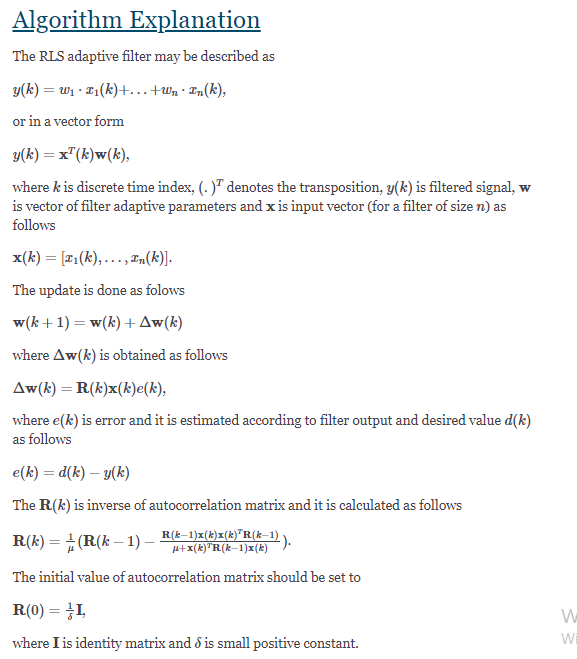

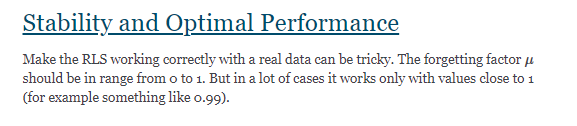

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import padasip as pa
import seaborn as sns

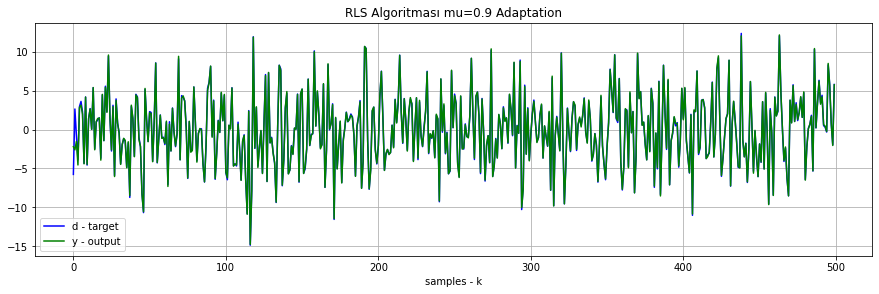

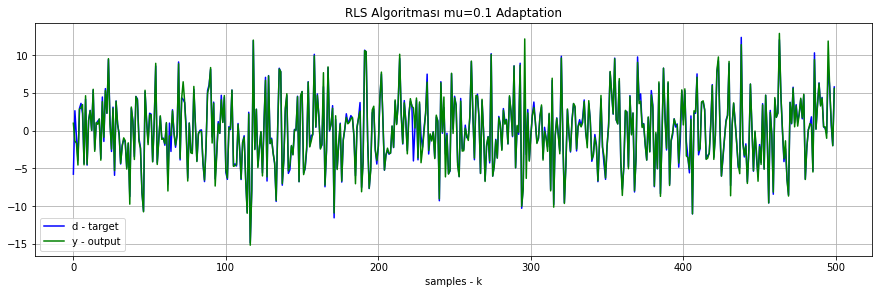

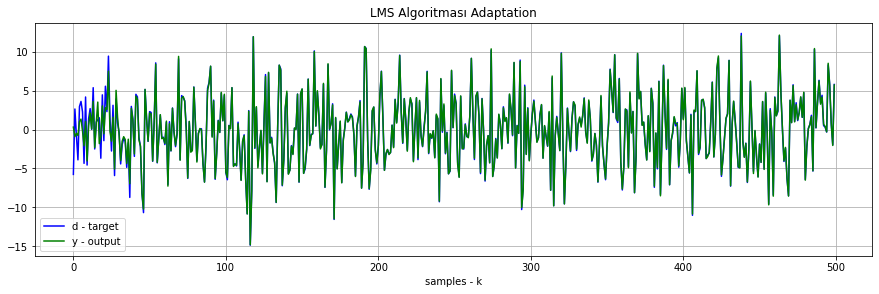

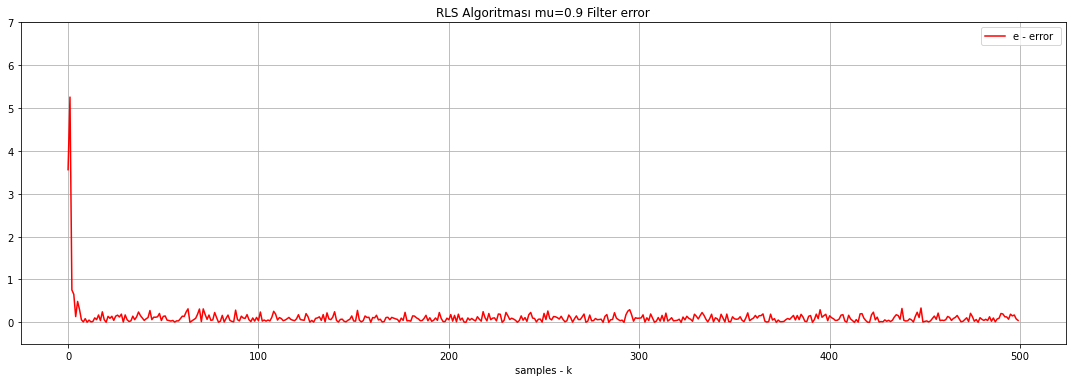

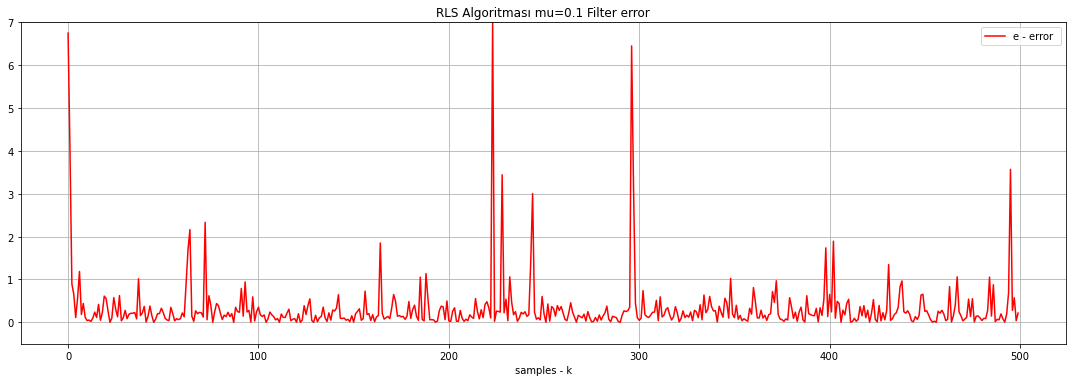

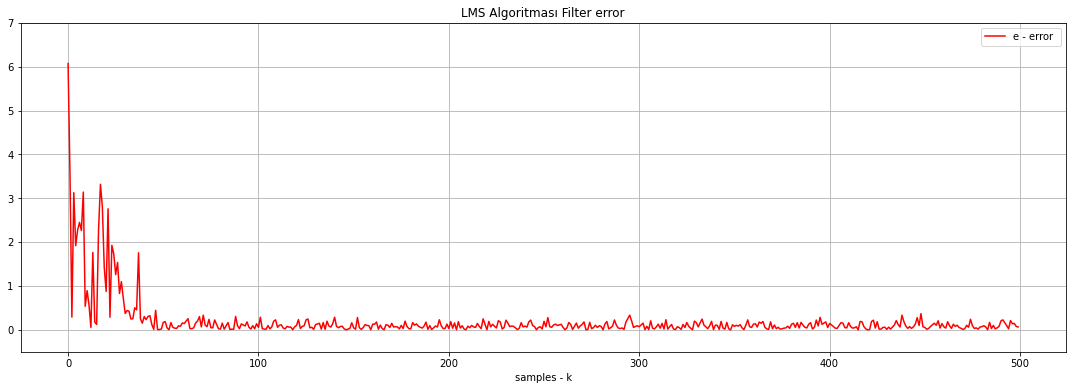

In [36]:

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target  

# RLS Algoritması mu=0.9 
f1 = pa.filters.FilterRLS(n = 4, mu = 0.9, w = "random")
y1, e1, w1 = f1.run(d, x)

# RLS Algoritması mu=0.1
f2 = pa.filters.FilterRLS(n = 4, mu = 0.1, w = "random")
y2, e2, w2 = f2.run(d,x)


# LMS Algoritması
f3 = pa.filters.FilterLMS(n = 4, mu = 0.1, w = "random")
y3, e3, w3 = f3.run(d, x)


# RLS MU = 0.9 
plt.figure(figsize=(15,30))
plt.subplot(611)
plt.title("RLS Algoritması mu=0.9 Adaptation")
plt.xlabel("samples - k")
plt.grid()
plt.plot(d,"b", label="d - target")
plt.plot(y1,"g", label="y - output")
plt.legend()

# RLS MU = 0.1 
plt.figure(figsize=(15,30))
plt.subplot(612)
plt.title("RLS Algoritması mu=0.1 Adaptation")
plt.xlabel("samples - k")
plt.grid()
plt.plot(d,"b", label="d - target")
plt.plot(y2,"g", label="y - output")
plt.legend()

# LMS
plt.figure(figsize=(15,30))
plt.subplot(613)
plt.title("LMS Algoritması Adaptation")
plt.xlabel("samples - k")
plt.grid()
plt.plot(d,"b", label="d - target")
plt.plot(y3,"g", label="y - output")
plt.legend()

# RLS MU = 0.9 Hata
plt.figure(figsize=(15,30))
plt.subplot(614)
plt.title("RLS Algoritması mu=0.9 Filter error")
plt.xlabel("samples - k")
plt.grid(which="major")
plt.plot(abs(e1),"r", label="e - error ") # 10*np.log10(e1**2)[dB]
plt.legend()
plt.tight_layout()
plt.ylim(-0.5,7)
plt.show()

# RLS MU = 0.1 Hata
plt.figure(figsize=(15,30))
plt.subplot(615)
plt.title("RLS Algoritması mu=0.1 Filter error")
plt.xlabel("samples - k")
plt.grid(which="major")
plt.plot(abs(e2),"r", label="e - error ") # 10*np.log10(e2**2)[dB]
plt.legend()
plt.tight_layout()
plt.ylim(-0.5,7)
plt.show()

# LMS Hata
plt.figure(figsize=(15,30))
plt.subplot(616)
plt.title("LMS Algoritması Filter error")
plt.xlabel("samples - k")
plt.grid(which="major")
plt.plot(abs(e3),"r", label="e - error ") # 10*np.log10(e3**2)[dB]
plt.legend()
plt.tight_layout()
plt.ylim(-0.5,7)
plt.show()



In [37]:
x_df = pd.DataFrame(x, columns= ["giris_x0","giris_x1","giris_x2","giris_x3"])
w_df = pd.DataFrame(w1, columns= ["w0","w1","w2","w3"])
v_df = pd.DataFrame(v, columns =["Noise"])
y_df = pd.DataFrame(y1, columns= ["Output"])
d_df = pd.DataFrame(d, columns= ["Desired_output"])
e_df = pd.DataFrame(e1, columns= ["Error"])

RLS = pd.concat([x_df,w_df,v_df,y_df,d_df,e_df], axis = 1)
RLS.head()

,giris_x0,giris_x1,giris_x2,giris_x3,w0,w1,w2,w3,Noise,Output,Desired_output,Error
0,-0.981569,-1.664523,0.988558,0.450301,0.977709,0.580178,-0.061864,-0.472002,0.098564,-2.199108,-5.760109,-3.561002
1,-1.145518,-0.559163,-1.158803,0.721744,1.688868,1.786145,-0.778086,-0.798251,-0.002662,-2.607859,2.646470,5.254329
2,0.078087,-0.446668,0.296377,0.359417,0.203190,1.553031,-3.103582,0.207617,0.126604,-1.523034,-0.767691,0.755344
3,-0.077965,0.236384,0.786821,-1.325236,1.399173,1.180901,-3.202430,1.658458,0.050428,-4.547527,-3.891764,0.655763
4,0.144608,1.137604,-0.734329,-0.907549,2.515360,-0.636128,-4.414376,0.062320,0.072766,2.825125,2.959284,0.134159


In [38]:
RLS.describe().T

,count,mean,std,min,25%,50%,75%,max
giris_x0,500.0,0.007577,1.055498,-2.470715,-0.706562,0.010520,0.769615,3.214463
giris_x1,500.0,0.027460,0.953116,-2.777306,-0.632746,-0.023483,0.670221,2.727338
giris_x2,500.0,0.014052,0.994917,-2.405027,-0.708953,0.048344,0.663652,2.731335
giris_x3,500.0,0.006605,1.014358,-3.903175,-0.700291,-0.031356,0.660694,2.683197
w0,500.0,1.998674,0.108007,0.203190,1.988166,2.004982,2.017849,2.744084
w1,500.0,0.106043,0.130159,-0.955857,0.083137,0.100941,0.119074,1.786145
w2,500.0,-3.978524,0.236579,-4.668800,-4.007049,-3.993313,-3.981510,-0.061864
w3,500.0,0.484735,0.100217,-0.798251,0.472869,0.490004,0.507596,1.658458
Noise,500.0,0.002402,0.103818,-0.269182,-0.072262,0.008603,0.072924,0.295414
Output,500.0,-0.042536,4.496733,-14.749618,-3.028984,0.067328,2.826708,12.172119


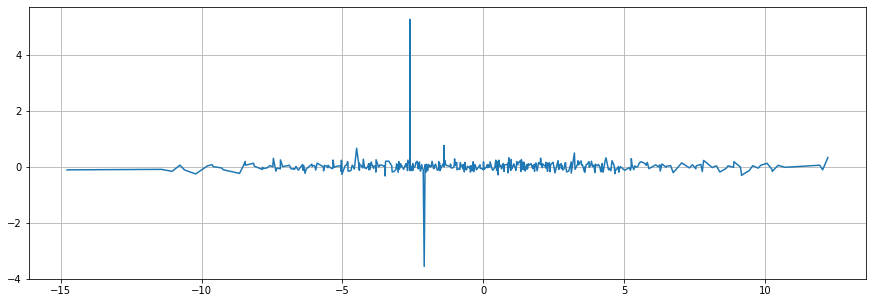

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(data = RLS, x = RLS.giris_x0*RLS.w0+RLS.giris_x1*RLS.w1+RLS.giris_x2*RLS.w2+RLS.giris_x3*RLS.w3+RLS.Noise,
                y = RLS.Desired_output - RLS.Output); # ,"Desired_output"
plt.grid()

In [40]:
RLS.corr()

,giris_x0,giris_x1,giris_x2,giris_x3,w0,w1,w2,w3,Noise,Output,Desired_output,Error
giris_x0,1.000000,0.025896,-0.000752,0.075375,0.026088,-0.069251,-0.069839,0.051673,-0.000584,0.480198,0.478198,-0.015096
giris_x1,0.025896,1.000000,0.120392,-0.020071,0.053310,-0.040432,-0.091701,0.045821,0.001358,-0.077402,-0.075278,0.028532
giris_x2,-0.000752,0.120392,1.000000,0.080677,-0.054033,0.019328,0.009727,0.027295,0.031224,-0.868294,-0.871253,-0.067950
giris_x3,0.075375,-0.020071,0.080677,1.000000,0.012871,-0.035268,0.020832,-0.080197,-0.086667,0.072935,0.074198,0.020407
w0,0.026088,0.053310,-0.054033,0.012871,1.000000,-0.772738,-0.612111,0.068140,-0.053021,0.058855,0.061302,0.037154
w1,-0.069251,-0.040432,0.019328,-0.035268,-0.772738,1.000000,0.673891,-0.113042,0.023851,-0.082610,-0.053792,0.415069
w2,-0.069839,-0.091701,0.009727,0.020832,-0.612111,0.673891,1.000000,-0.557963,0.038987,-0.047095,-0.040009,0.101286
w3,0.051673,0.045821,0.027295,-0.080197,0.068140,-0.113042,-0.557963,1.000000,-0.041405,0.005113,-0.008911,-0.202999
Noise,-0.000584,0.001358,0.031224,-0.086667,-0.053021,0.023851,0.038987,-0.041405,1.000000,-0.037179,-0.014537,0.326921
Output,0.480198,-0.077402,-0.868294,0.072935,0.058855,-0.082610,-0.047095,0.005113,-0.037179,1.000000,0.997615,-0.005666


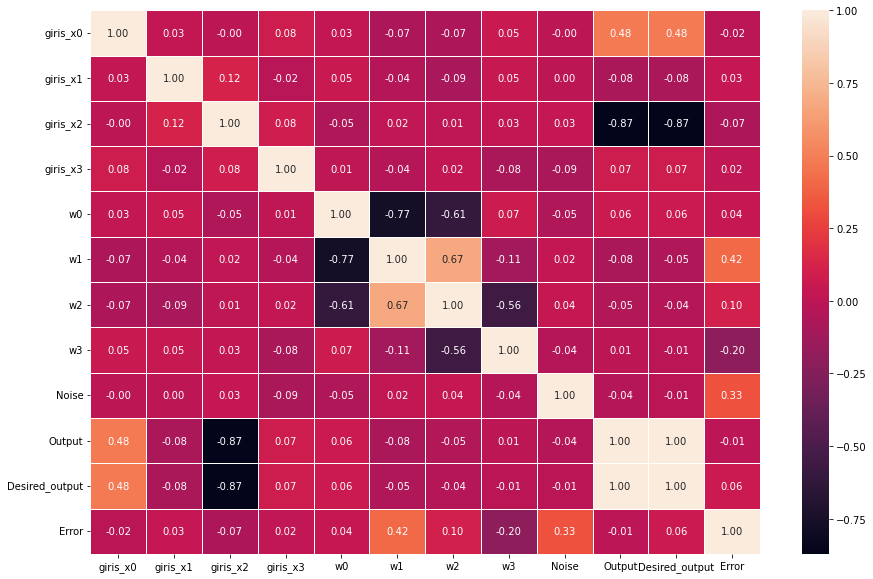

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(data = RLS.corr(), annot = True, linewidths = 1, fmt='.2f');

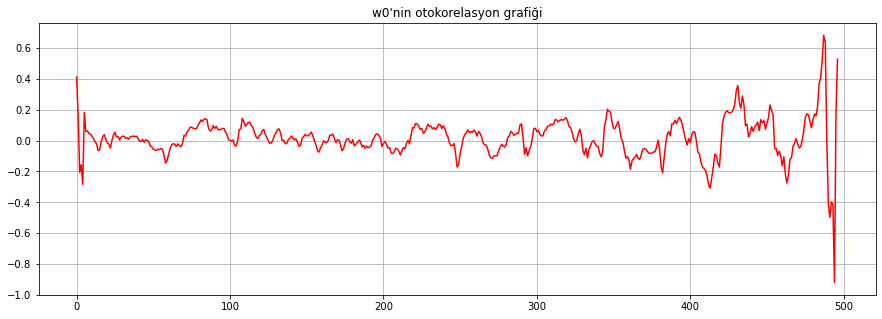

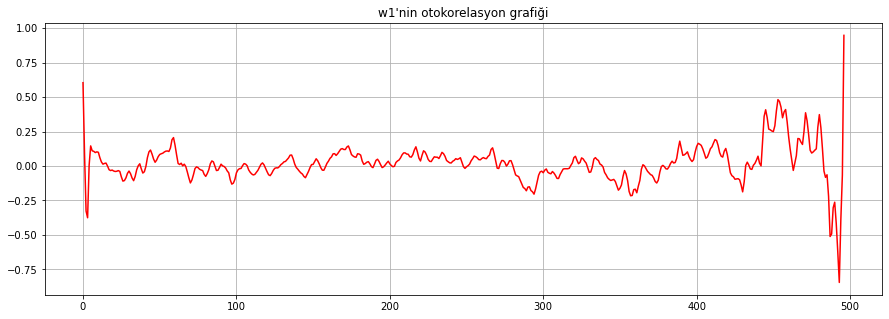

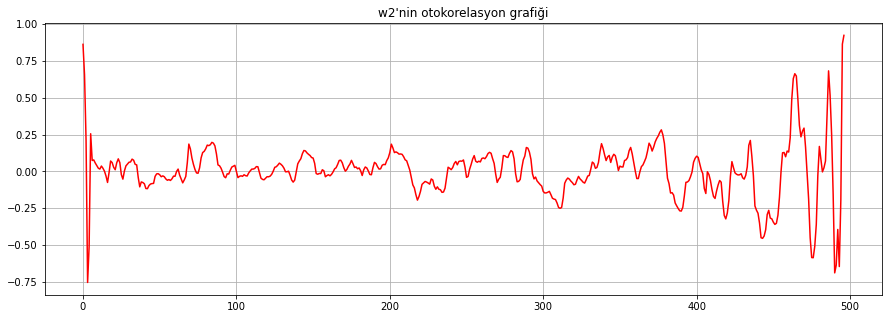

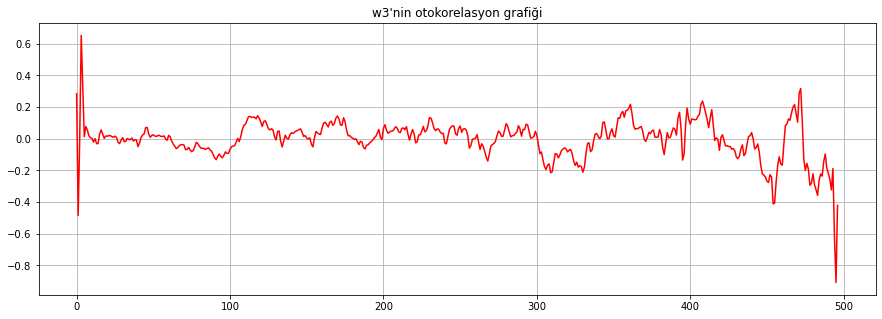

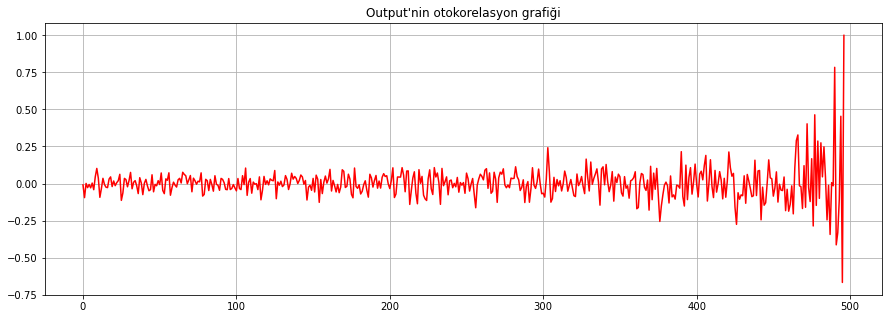

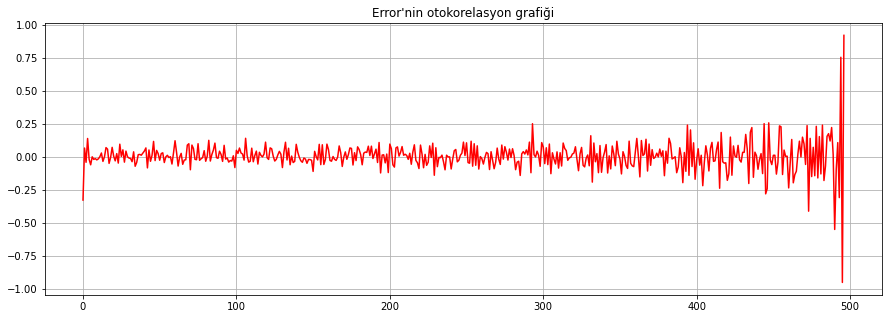

In [42]:
cols = ['w0', 'w1', 'w2', 'w3','Output', 'Error']
for i in cols:
    plt.figure(figsize = (15,5))
    plt.plot(np.vectorize(RLS[i].autocorr)(np.arange(1,len(RLS[i])-2)), "r")
    plt.grid()
    plt.title(f"{i}'nin otokorelasyon grafiği")
    plt.show()

In [43]:
def fibonacci(sayi):
    # Base Case
    if sayi == 0:
        return 0
    elif sayi == 1:
        return 1
    # Recursive Case
    else:
        return fibonacci(sayi-1) + fibonacci(sayi-2)

In [44]:
fibonacci(6)

8

In [45]:
"""
    f(x) = f(x+1) + x fonksiyonunu çözmeye çalışacağız.
    Eğer fonksiyonu x: x-1 şeklinde yeniden yazarsak
    f(x-1) = f(x) + x - 1 olur. Buradan da
    f(x) = f(x-1) - x + 1 çıkar.
"""


def f(x):
    # Başlangıç değerimiz olan f(2) = 10 un tanımlayalım
    if x == 2:
        return 10
    # Şimdi de çıkış değerimizi verecek olan işlemi tanımlayalım.
    elif x > 2:
        return f(x-1) - x + 1
    else:
        return f(x+1) + x

In [46]:
f(5)

1

In [47]:
f(-2)

8

In [48]:
# x = 2
x = 2 * (x + 1) + 3
print(x)

[[3.0368616  1.6709537  6.9771167  5.90060205]
 [2.70896389 3.88167399 2.68239363 6.44348795]
 [5.15617396 4.10666344 5.59275485 5.71883389]
 ...
 [4.4700073  1.46029332 4.54785512 7.71054309]
 [3.60108555 5.56552389 5.17938961 3.69648923]
 [3.47590434 3.33076182 1.32708409 5.1652788 ]]
